In [13]:
from methods import *
from pathlib import Path
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2 as cv
import torch
import torch.nn as nn

In [14]:
data_path = (Path.cwd() / 'data' / 'Slice44-AllChannels.nii').as_posix()

In [15]:
img_nib = nib.load(data_path)

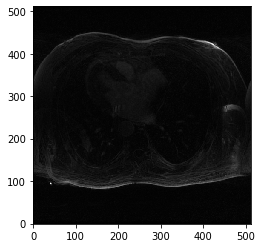

In [16]:
prev_img = combine_images(img_nib.dataobj)
plt.imshow(prev_img, cmap='gray', origin='lower', interpolation='none')
prev_img = np.flip(prev_img, [0,1])
plt.show()

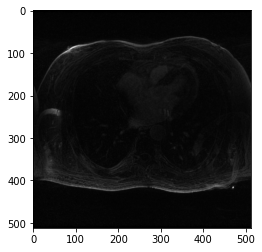

In [17]:
prev_img[prev_img < 50] = 0
plt.imshow(prev_img, cmap='gray')
plt.show()

In [18]:
def auto_contrast(image, q=.99, dim=None):
    flat = image.flatten()
    sort_flat = np.sort(flat)
    #lower_lim = np.quantile(sort_flat, 0.01)
    nval = len(image[image < 50])
    limit = np.quantile(sort_flat[nval:], q)
    print(limit)
    flat[flat < 50] = 50
    flat[flat > limit] = limit
    #flat[flat > lower_lim] = lower_lim
    if dim:
        return flat.reshape(*image.shape[:2], dim)
    return flat.reshape(*image.shape[:2])

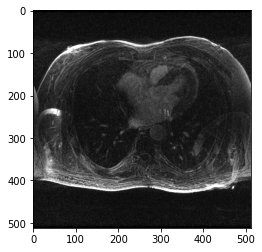

In [19]:
test = prev_img.copy()
#test = auto_contrast(test, 0.9)
test = cv.convertScaleAbs(
    test, alpha=0.2, beta=0
)
#test = cv.normalize(
#    test, None, 0, 255,
#    cv.NORM_MINMAX                      
#)
plt.imshow(test, cmap='gray')
plt.show()

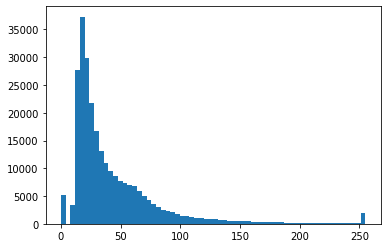

In [20]:
plt.hist(test.flatten(), bins=64)
plt.show()

In [21]:
test2 = prev_img.copy()
hist, bins = np.histogram(test2, bins=64)
flat_test = test2.flatten()
flat_test[flat_test < bins[1]] = bins[1]
limit = np.quantile(bins, 0.1)
flat_test[flat_test > limit] = limit
#test2 = test2/1000
test2 = (test2 - test2.mean())/test2.std()
#test2 = flat_test.reshape(512,512)

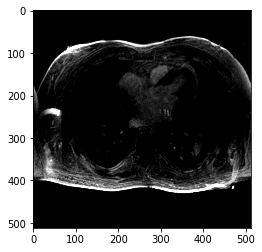

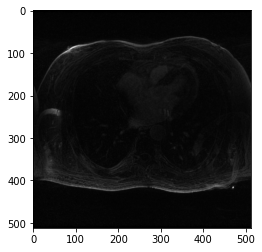

In [22]:
plt.imshow(test2, cmap='gray', vmin=0.0, vmax=4.0)
plt.show()
plt.imshow(test2,cmap='gray')
plt.show()

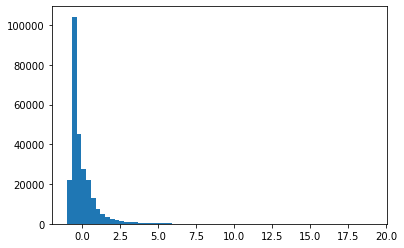

In [23]:
plt.hist(test2.flatten(), 64)
plt.show()

3543.9804427099407


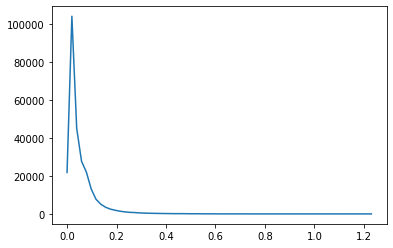

In [30]:
test3 = prev_img.copy()
hist,bins = np.histogram(test3.flatten(), bins=64)
limit = np.quantile(bins, 0.8)
print(limit)
test3/=limit
hist,bins = np.histogram(test3.flatten(), bins=64)
plt.plot(bins[:-1], hist)
plt.show()

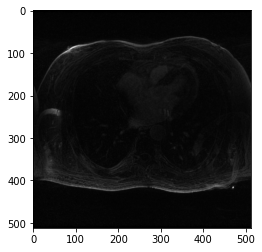

In [31]:
plt.imshow(test3, cmap='gray')
plt.show()

In [ ]:
denoised = cv.fastNlMeansDenoising(noise, None)

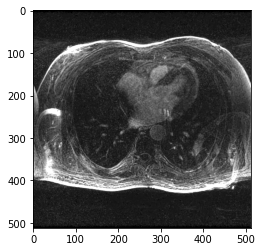

In [ ]:
plt.imshow(denoised,cmap='gray')
plt.show()